# Investigating and Identifying Poisoning Attacks on Machine Learning

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Poisoning Attacks

#### Setting up Data

In [48]:
FrequencyData1=pd.read_csv("FrequencyData1.csv")
FrequencyData2=pd.read_csv("FrequencyData2.csv")
FrequencyData3=pd.read_csv("FrequencyData3.csv")
FrequencyData4=pd.read_csv("FrequencyData4.csv")
FrequencyData5=pd.read_csv("FrequencyData5.csv")
FrequencyDataPoison=pd.read_csv("FrequencyDataPoison.csv")

In [49]:
scaler = MinMaxScaler()
scaler.fit(FrequencyData1)
scaler.fit(FrequencyData2)
scaler.fit(FrequencyData3)
scaler.fit(FrequencyData4)
scaler.fit(FrequencyData5)
scaler.fit(FrequencyDataPoison)
SFrequencyData1 = scaler.transform(FrequencyData1)
SFrequencyData2 = scaler.transform(FrequencyData2)
SFrequencyData3 = scaler.transform(FrequencyData3)
SFrequencyData4 = scaler.transform(FrequencyData4)
SFrequencyData5 = scaler.transform(FrequencyData5)
SFrequencyDataPoison = scaler.transform(FrequencyDataPoison)
Features1 = SFrequencyData1[:,0:9]
Targets1 = SFrequencyData1[:,9]
Features2 = SFrequencyData2[:,0:9]
Targets2 = SFrequencyData2[:,9]
Features3 = SFrequencyData3[:,0:9]
Targets3 = SFrequencyData3[:,9]
Features4 = SFrequencyData4[:,0:9]
Targets4 = SFrequencyData4[:,9]
Features5 = SFrequencyData5[:,0:9]
Targets5 = SFrequencyData5[:,9]
FeaturesP = SFrequencyDataPoison[:,0:9]
TargetsP = SFrequencyDataPoison[:,9]

#### First Round of Neural Network Machine Learing

In [50]:
NNRmodel = MLPRegressor(random_state=1, max_iter=500).fit(Features2, Targets2)
NNRpredict1 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=500).fit(Features4, Targets4)
NNRpredict3 = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=500).fit(FeaturesP, TargetsP)
NNRpredict5 = NNRmodel.predict(Features5)

<function matplotlib.pyplot.show(close=None, block=None)>

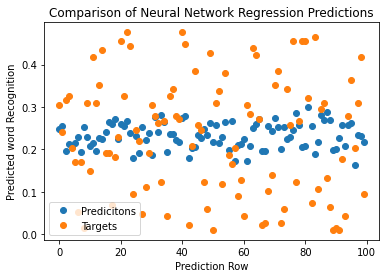

In [51]:
plt.plot(NNRpredict1, 'o')
plt.plot(Targets2, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['Predicitons', 'Targets'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

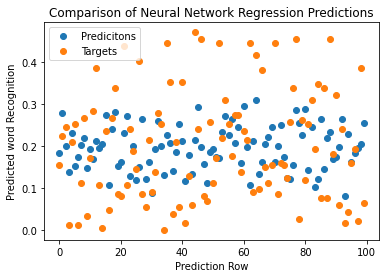

In [52]:
plt.plot(NNRpredict3, 'o')
plt.plot(Targets4, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['Predicitons', 'Targets'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

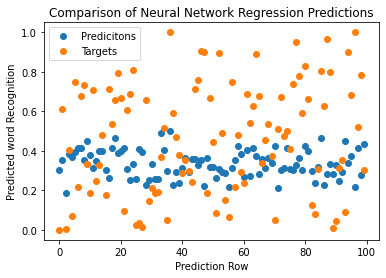

In [53]:
plt.plot(NNRpredict5, 'o')
plt.plot(TargetsP, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['Predicitons', 'Targets'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

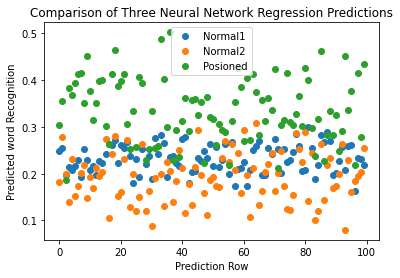

In [54]:
plt.plot(NNRpredict1, 'o')
plt.plot(NNRpredict3, 'o')
plt.plot(NNRpredict5, 'o')
plt.title('Comparison of Three Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['Normal1', 'Normal2','Posioned'])
plt.show

#### Second Round of Neural Network Machine Learning

In [55]:
NNRmodel = MLPRegressor(random_state=1, max_iter=500).fit(Features1, NNRpredict1)
NNRpredictNP = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=500).fit(Features5, NNRpredict5)
NNRpredictP2 = NNRmodel.predict(Features4)

<function matplotlib.pyplot.show(close=None, block=None)>

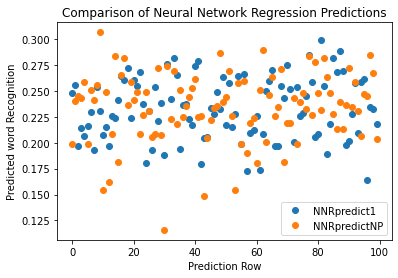

In [56]:
plt.plot(NNRpredict1, 'o')
plt.plot(NNRpredictNP, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['NNRpredict1', 'NNRpredictNP'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

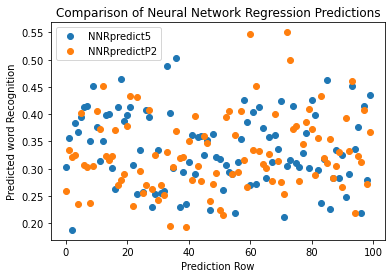

In [57]:
plt.plot(NNRpredict5, 'o')
plt.plot(NNRpredictP2, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['NNRpredict5', 'NNRpredictP2'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

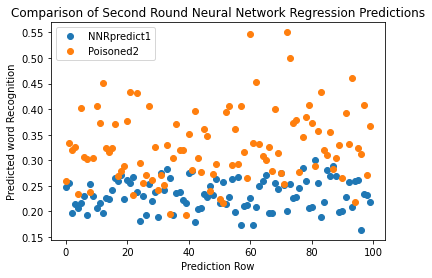

In [58]:
plt.plot(NNRpredict1, 'o')
plt.plot(NNRpredictP2, 'o')
plt.title('Comparison of Second Round Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['NNRpredict1', 'Poisoned2'])
plt.show

#### Analysing Results

In [59]:
np.array_equal(NNRpredictNP, NNRpredictP2, equal_nan=True)
NNR1Mean = np.mean(NNRpredict1)
NNR3Mean = np.mean(NNRpredict3)
PNNR5Mean = np.mean(NNRpredict5)
FRArray = [NNR1Mean, NNR3Mean, PNNR5Mean]
FRMean = np.mean(FRArray)
NPMean = np.mean(NNRpredictNP)
PMean = np.mean(NNRpredictP2)
if PMean < (NPMean*0.75) or PMean > (NPMean*1.25):
    print("The mean of poisoned data is not within a 25% range of the mean of non poisoned data")
else:
    print("The mean of poisoned data is within a 25% range of the mean of non poisoned data")

The mean of poisoned data is not within a 25% range of the mean of non poisoned data


<function matplotlib.pyplot.show(close=None, block=None)>

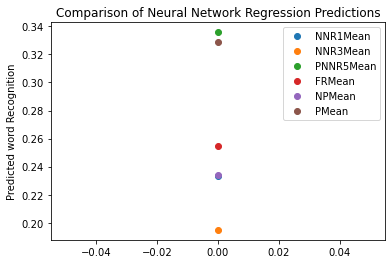

In [60]:
plt.plot(NNR1Mean, 'o')
plt.plot(NNR3Mean, 'o')
plt.plot(PNNR5Mean, 'o')
plt.plot(FRMean, 'o')
plt.plot(NPMean, 'o')
plt.plot(PMean, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('')
plt.legend(['NNR1Mean', 'NNR3Mean', 'PNNR5Mean','FRMean', 'NPMean', 'PMean'])
plt.show

#### Countering Posioning

In [61]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features2, Targets2)
NNRpredictT2 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features3, Targets3)
NNRpredictT3 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features4, Targets4)
NNRpredictT4 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features5, Targets5)
NNRpredictT5 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(FeaturesP, TargetsP)
NNRpredictTP = NNRmodel.predict(Features1)

<function matplotlib.pyplot.show(close=None, block=None)>

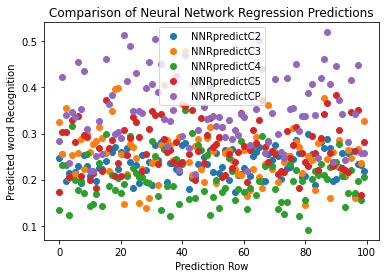

In [62]:
plt.plot(NNRpredictT2, 'o')
plt.plot(NNRpredictT3, 'o')
plt.plot(NNRpredictT4, 'o')
plt.plot(NNRpredictT5, 'o')
plt.plot(NNRpredictTP, 'o')
plt.title('Comparison of Neural Network Regression Predictions')
plt.ylabel('Predicted word Recognition')
plt.xlabel('Prediction Row')
plt.legend(['NNRpredictC2', 'NNRpredictC3', 'NNRpredictC4', 'NNRpredictC5', 'NNRpredictCP'])
plt.show

In [63]:
T2Mean = np.mean(NNRpredictT2)
T3Mean = np.mean(NNRpredictT3)
T4Mean = np.mean(NNRpredictT4)
T5Mean = np.mean(NNRpredictT5)
TPMean = np.mean(NNRpredictTP)
TMeanArray = [T2Mean, T3Mean, T4Mean, T5Mean, TPMean]
FullMean = np.mean(TMeanArray)
Model = ["FrequencyData2", "FrequencyData3", "FrequencyData4", "FrequencyData5", "FrequencyDataPoison"]

In [64]:
TestMean = []
a = 0
Pos = 0
while a < 5 :
    TMeanArray = [T2Mean, T3Mean, T4Mean, T5Mean, TPMean]
    del TMeanArray[Pos]
    TestMean.append(np.mean(TMeanArray))
    Pos += 1
    a += 1

In [65]:
TPredictionsArray = [NNRpredictT2, NNRpredictT3, NNRpredictT4, NNRpredictT5, NNRpredictTP]
KFinder = []
Score = []
T = 0
while T < 5 :
    if TestMean[T] > FullMean*1.05 or TestMean[T] < FullMean*0.95 :
        Score.append(1)
        KFinder.append(TPredictionsArray[T])
        print("Training set", Model[T], "may be a poisoned data set ")
    else:
        Score.append(0)
    T += 1

Training set FrequencyData4 may be a poisoned data set 
Training set FrequencyDataPoison may be a poisoned data set 


#### Investigation Data Set P

In [9]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features1, Targets1)
NNRpredict12 = NNRmodel.predict(Features2)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features1, Targets1)
NNRpredict13 = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features1, Targets1)
NNRpredict14 = NNRmodel.predict(Features4)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features1, Targets1)
NNRpredict15 = NNRmodel.predict(Features5)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features1, Targets1)
NNRpredict1P = NNRmodel.predict(FeaturesP)

In [10]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features2, Targets2)
NNRpredict21 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features2, Targets2)
NNRpredict23 = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features2, Targets2)
NNRpredict24 = NNRmodel.predict(Features4)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features2, Targets2)
NNRpredict25 = NNRmodel.predict(Features5)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features2, Targets2)
NNRpredict2P = NNRmodel.predict(FeaturesP)

In [11]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features3, Targets3)
NNRpredict31 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features3, Targets3)
NNRpredict32 = NNRmodel.predict(Features2)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features3, Targets3)
NNRpredict34 = NNRmodel.predict(Features4)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features3, Targets3)
NNRpredict35 = NNRmodel.predict(Features5)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features3, Targets3)
NNRpredict3P = NNRmodel.predict(FeaturesP)

In [12]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features4, Targets4)
NNRpredict41 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features4, Targets4)
NNRpredict42 = NNRmodel.predict(Features2)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features4, Targets4)
NNRpredict43 = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features4, Targets4)
NNRpredict45 = NNRmodel.predict(Features5)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features4, Targets4)
NNRpredict4P = NNRmodel.predict(FeaturesP)

In [13]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features5, Targets5)
NNRpredict51 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features5, Targets5)
NNRpredict52 = NNRmodel.predict(Features2)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features5, Targets5)
NNRpredict53 = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features5, Targets5)
NNRpredict54 = NNRmodel.predict(Features4)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(Features5, Targets5)
NNRpredict5P = NNRmodel.predict(FeaturesP)

In [14]:
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(FeaturesP, TargetsP)
NNRpredictP1 = NNRmodel.predict(Features1)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(FeaturesP, TargetsP)
NNRpredictP2 = NNRmodel.predict(Features2)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(FeaturesP, TargetsP)
NNRpredictP3 = NNRmodel.predict(Features3)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(FeaturesP, TargetsP)
NNRpredictP4 = NNRmodel.predict(Features4)
NNRmodel = MLPRegressor(random_state=1, max_iter=2000).fit(FeaturesP, TargetsP)
NNRpredictP5 = NNRmodel.predict(Features5)

In [30]:
msg = []

In [45]:
Set1 = [NNRpredict21, NNRpredict31, NNRpredict41, NNRpredict51, NNRpredictP1]
Set1Key = ["Data set 2", "Data set 3","Data set 4","Data set 5","Data set P",]
Set1Mean = np.mean(Set1)
Set1Means = []
Set1Diff = []
for x in Set1:
    Set1Means.append(np.mean(x))
    Mean = np.mean(x)
    Diff = abs(Set1Mean - Mean)
    Set1Diff.append(Diff)
BigDiff = max(Set1Diff)
c = 0
while c < 5:
    ThisDiff = Set1Diff[c]
    if BigDiff == ThisDiff:
        msg.append(Set1Key[c])
    c += 1

In [44]:
Set2 = [NNRpredict12, NNRpredict32, NNRpredict42, NNRpredict52, NNRpredictP2]
Set2Key = ["Data set 1", "Data set 3","Data set 4","Data set 5","Data set P",]
Set2Mean = np.mean(Set2)
Set2Means = []
Set2Diff = []
for x in Set2:
    Set2Means.append(np.mean(x))
    Mean = np.mean(x)
    Diff = abs(Set2Mean - Mean)
    Set2Diff.append(Diff)
BigDiff = max(Set2Diff)
c = 0
while c < 5:
    ThisDiff = Set2Diff[c]
    if BigDiff == ThisDiff:
        msg.append(Set2Key[c])
    c += 1

In [43]:
Set3 = [NNRpredict13, NNRpredict23, NNRpredict43, NNRpredict53, NNRpredictP3]
Set3Key = ["Data set 1", "Data set 2","Data set 4","Data set 5","Data set P",]
Set3Mean = np.mean(Set2)
Set3Means = []
Set3Diff = []
for x in Set3:
    Set3Means.append(np.mean(x))
    Mean = np.mean(x)
    Diff = abs(Set3Mean - Mean)
    Set3Diff.append(Diff)
BigDiff = max(Set3Diff)
c = 0
while c < 5:
    ThisDiff = Set3Diff[c]
    if BigDiff == ThisDiff:
        msg.append(Set3Key[c])
    c += 1

In [42]:
Set4 = [NNRpredict14, NNRpredict24, NNRpredict34, NNRpredict54, NNRpredictP4]
Set4Key = ["Data set 1", "Data set 2","Data set 3","Data set 5","Data set P",]
Set4Mean = np.mean(Set4)
Set4Means = []
Set4Diff = []
for x in Set4:
    Set4Means.append(np.mean(x))
    Mean = np.mean(x)
    Diff = abs(Set4Mean - Mean)
    Set4Diff.append(Diff)
BigDiff = max(Set4Diff)
c = 0
while c < 5:
    ThisDiff = Set4Diff[c]
    if BigDiff == ThisDiff:
        msg.append(Set4Key[c])
    c += 1

In [41]:
Set5 = [NNRpredict15, NNRpredict25, NNRpredict35, NNRpredict45, NNRpredictP5]
Set5Key = ["Data set 1", "Data set 2","Data set 3","Data set 4","Data set P",]
Set5Mean = np.mean(Set5)
Set5Means = []
Set5Diff = []
for x in Set5:
    Set5Means.append(np.mean(x))
    Mean = np.mean(x)
    Diff = abs(Set5Mean - Mean)
    Set5Diff.append(Diff)
BigDiff = max(Set5Diff)
c = 0
while c < 5:
    ThisDiff = Set5Diff[c]
    if BigDiff == ThisDiff:
        msg.append(Set5Key[c])
    c += 1

In [40]:
m = 0
ds = 1
while m < 5:
    print("The data set", msg[m], "deviated the targets of data set", ds, "the most")
    m += 1

The data set Data set P deviated the targets of data set 1 the most
The data set Data set P deviated the targets of data set 1 the most
The data set Data set P deviated the targets of data set 1 the most
The data set Data set P deviated the targets of data set 1 the most
The data set Data set P deviated the targets of data set 1 the most
